#### Chembl Target ID for E. coli: CHEMBL354 (no. mols: 65k)
#### Chembl Target ID for S. aureus: CHEMBL352 (no. mols: 113k)

Criteria for valid dataset: 

    Preffered measurement unit: ug.mL-1 and nM	(easy to convert to pMIC)
    Preferred *NO* Molecule Name (Looking for unknown molecules)
    
    

In [2]:
import sys
sys.path.append("/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/")
import pandas as pd
from descriptastorus.descriptors.DescriptorGenerator import MakeGenerator
import numpy as np
from rdkit import Chem
import re
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import pickle

RDKit WARNING: [11:50:17] Enabling RDKit 2019.09.2 jupyter extensions


In [3]:
e_coli_master=pd.read_csv('data/master_e_coli.csv', low_memory=False, dtype=np.unicode_,  sep=';')
s_aureus_master=pd.read_csv('data/master_s_aureus.csv', dtype=np.unicode_ , sep=';')

In [4]:
e_coli_master.describe()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
count,65103,17404,65103,65103,65103,65103,65083,64994,65103,63220,...,65103,65103,65103,65103,65103,65103,64145,64145,65103,0
unique,35134,1550,5,16603,6,1649,8036,35029,1,5,...,1,1,1,2923,3,3,22,45,1,0
top,CHEMBL8,CIPROFLOXACIN,0,331.35,0,None,1,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,MIC,'=',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL4184210,1,Scientific Literature,J. Med. Chem.,2010,None,NaN
freq,1296,1296,50247,1327,36182,4455,884,1296,65103,45480,...,65103,65103,65103,855,64145,64145,11590,6152,65103,NaN


In [25]:
e_coli_master

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3355088,NaN,0,740.09,2,2.63,LP24,CCCCCCCCCCCCCCCCCC(=O)NC(CCCN)C(=O)NC(CCCN)C(=...,MIC,'=',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL3352151,1,Scientific Literature,Eur. J. Med. Chem.,2014,None,NaN
1,CHEMBL529,AZITHROMYCIN,4,749.00,2,1.90,Azithromycin,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,MIC,'=',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL1131863,1,Scientific Literature,Bioorg. Med. Chem. Lett.,1999,None,NaN
2,CHEMBL3352888,NaN,0,456.54,0,4.93,9,CCc1oc(OC)c(Cc2c(O)c3c(c(C(=O)[C@@H](C)CC)c2O)...,MIC,'>',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL3351231,1,Scientific Literature,J. Nat. Prod.,2015,None,NaN
3,CHEMBL15461,NaN,0,379.82,0,2.63,1h-2,CC1CN(c2c(F)cc3c(=O)c(C(=O)O)cn(C4CC4)c3c2Cl)CCN1,MIC,'=',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL1125826,1,Scientific Literature,J. Med. Chem.,1991,None,NaN
4,CHEMBL194126,NaN,0,449.55,2,-3.98,Gentamycin,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,'=',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL4382229,1,Scientific Literature,Eur J Med Chem,2019,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65098,CHEMBL3235078,NaN,0,341.40,0,2.60,23,CCNC(=O)Nc1ccc(-c2nc3cccc(C(N)=O)c3s2)cn1,MIC,'>',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL3232928,1,Scientific Literature,J. Med. Chem.,2013,None,NaN
65099,CHEMBL3236799,NaN,0,455.69,1,6.85,3j,CCCCCCCCCCC/C(Nc1ccc(N)cc1)=C1\C(=O)CN(CCCCCC)...,MIC,'>',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL3232809,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2014,None,NaN
65100,CHEMBL4434790,NaN,0,294.79,0,4.82,MC628,Cc1ccc2nc(Cl)c(/C=N/Cc3ccccc3)cc2c1,MIC,'>',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL4513135,40,CO-ADD antimicrobial screening data,NaN,NaN,None,NaN
65101,CHEMBL3247349,NaN,0,478.45,1,-2.70,13,Cn1nnnc1NCC1=C(C(=O)[O-])N2C(=O)[C@@H](NC(=O)C...,MIC,'=',...,Escherichia coli,Escherichia coli,ORGANISM,CHEMBL3244150,1,Scientific Literature,J. Med. Chem.,1977,None,NaN


In [6]:
counts = e_coli_master['Assay Description'].value_counts().rename_axis('unique_values').reset_index(name='counts')

descriptor_values_under_5 = list(counts[counts['counts']<5].unique_values)

In [8]:
counts[counts['counts']<5].unique_values

3351    Antibacterial activity against Escherichia col...
3352    Antibacterial activity against qnrB gene expre...
3353    In vitro antibacterial activity against Escher...
3354    Antibacterial activity against Escherichia col...
3355    Antibacterial activity against Escherichia col...
                              ...                        
6010    Tested in vitro for antimicrobial activity aga...
6011    Antimicrobial activity against qnrS1-positive ...
6012    Antibacterial activity against Escherichia col...
6013    Antibacterial activity against Escherichia col...
6014    Antimicrobial activity against Escherichia col...
Name: unique_values, Length: 2664, dtype: object

In [10]:
counts[counts['counts']>5].counts.sum()

58305

In [11]:
e_coli_master['Assay Description'].unique()

array(['Antibacterial activity against clinical isolates of Escherichia coli PGI/DML02250 after overnight incubation by microdilution broth assay',
       'The compound was tested in vitro for antibacterial activity against Escherichia coli 250 UCS',
       'Antimicrobial activity against Escherichia coli ATCC 35218 after 24 hrs by broth microdilution method',
       ...,
       'Antimicrobial activity against Escherichia coli after 24 hrs by two fold serial dilution method',
       'Antibacterial activity against Escherichia coli D21f2tolC by broth microdilution assay',
       'Potentiation of colistin-induced antibacterial activity against Escherichia coli YD626 harbouring mcr-1 gene assessed as reduction in colistin MIC at 15 uM incubated for 16 hrs by broth microdilution method (Rvb = 8 ug/ml)'],
      dtype=object)

In [ ]:
# Stuff to grab: 'Molecule ChEMBL ID', 'Molecule Name', 'Molecular Weight',  'Smiles', 'Standard Units',  'Standard Value', 

In [12]:
# Info on all columns
for column in e_coli_master.columns:
    print(column)
    print('NaN:', e_coli_master[column].isna().sum())
    print(e_coli_master[column].value_counts())

Molecule ChEMBL ID
NaN: 0
CHEMBL8          1296
CHEMBL44354       845
CHEMBL148         714
CHEMBL1730        701
CHEMBL702         613
                 ... 
CHEMBL111549        1
CHEMBL270009        1
CHEMBL4101441       1
CHEMBL385122        1
CHEMBL1254435       1
Name: Molecule ChEMBL ID, Length: 35134, dtype: int64
Molecule Name
NaN: 47699
CIPROFLOXACIN              1296
CEFTAZIDIME                 845
IMIPENEM                    731
CEFOTAXIME                  701
PIPERACILLIN                613
                           ... 
CHLORHEXIDINE DIACETATE       1
ACHYROFURAN                   1
MAGNOVATIN A                  1
DERRICIN                      1
VALERYLPYRROTHINE             1
Name: Molecule Name, Length: 1550, dtype: int64
Molecule Max Phase
NaN: 0
0    50247
4    14407
3      291
1       81
2       77
Name: Molecule Max Phase, dtype: int64
Molecular Weight
NaN: 0
331.35     1327
546.59      845
299.35      715
455.47      709
517.56      615
           ... 
1096.34      

In [ ]:
list(e_coli_master['Assay Description'].unique())

### Before Looking at units and converting them and searching for NaNs I'll check the overlap of data between two sets

(I will only take nameless molecules)

In [ ]:
# # take rows where Mol name == nan

# e_coli_smiles = e_coli_master[e_coli_master['Molecule Name'].isna()].reset_index(drop=True)[['Smiles', 'Standard Value']].dropna()
# s_aureus_smiles = s_aureus_master[s_aureus_master['Molecule Name'].isna()].reset_index(drop=True)[['Smiles', 'Standard Value']].dropna()

e_coli_smiles = e_coli_master[e_coli_master['Molecule Name'].isna()][['Smiles', 'Standard Value', 'Standard Units', 'Molecular Weight']].dropna()
s_aureus_smiles = s_aureus_master[s_aureus_master['Molecule Name'].isna()][['Smiles', 'Standard Value', 'Standard Units', 'Molecular Weight']].dropna()

# take rows where Standard Units ==  ug.mL-1

e_coli_smiles = e_coli_smiles[e_coli_smiles['Standard Units'] =='ug.mL-1']
s_aureus_smiles = s_aureus_smiles[s_aureus_smiles['Standard Units'] =='ug.mL-1']


In [ ]:
# Value conversion time


def uM(ug, mass):  # write a function that returns uM as calculated by ug * 1/mass * 1000
    return float(ug) * (1/float(mass)) * 1000

e_coli_smiles["uM"] = e_coli_smiles.apply(lambda x :uM(x["Standard Value"], x["Molecular Weight"]), axis=1) # apply the function to the databas
s_aureus_smiles["uM"] = s_aureus_smiles.apply(lambda x :uM(x["Standard Value"], x["Molecular Weight"]), axis=1) # apply the function to the databas


# Convert uM to pMIC

e_coli_smiles['pMIC'] = [round(-1*np.log10(float(x) / 1000000), 2) for x in e_coli_smiles['Standard Value'].values] 
s_aureus_smiles['pMIC'] = [round(-1*np.log10(float(x) / 1000000), 2) for x in s_aureus_smiles['Standard Value'].values] 

In [ ]:
e_coli_smiles = e_coli_smiles.drop_duplicates(subset=['Smiles'], keep = 'first')
s_aureus_smiles = s_aureus_smiles.drop_duplicates(subset=['Smiles'], keep = 'first')

In [ ]:
merge = e_coli_smiles[['Smiles', 'pMIC']].merge(s_aureus_smiles[['Smiles', 'pMIC']], how='inner', on = 'Smiles', suffixes=['_e_coli','_s_aureus'])

In [ ]:
print('permeating compounds:', len(merge[(merge['pMIC_s_aureus']>=5) & (merge['pMIC_e_coli']>=5)]))

print('non-permeating compounds:', len(merge[(merge['pMIC_s_aureus']>=5) & (merge['pMIC_e_coli']<5)]))

### There is huge overlap! Let's go in there in detail and sort this out

#### E. coli

In 65k of ecoli datapoints there are 6k unique descriptors, that sometimes mention strain (there is no strain column that i can filter by easily), since i want to clear up my data of mutants and susceptible strains i need to get clever about this...

For the rest of compounds look at unique 'assay description' in E. coli (for every compound), text search and discard descriptors containing the following keywords:
    1. sensitivity
    2. sensitive
    3. deficient
    4. susceptible
    5. mutated
    6. delta
    7. transformed
    8. plasmid
    9. substituted
    10. gene
    11. tol
    12. ipx
    13. ampC
    14. harboring
    15. lacking
    16. transconjugated 
    17. efflux
    18. lpx
    19. SR58
    20. rec
    21. uvr

I want compounds that are not susceptible or are mutants

In [3]:
# filter out keywords in ecoli dataset assay description

letgo_descriptors=[]
for descriptor in e_coli_master['Assay Description'].unique():
    descriptor_lower = descriptor.lower()
    if re.search('(.*?)uvr(.*?)|(.*?)rec(.*?)|(.*?)sr58(.*?)|(.*?)lpx(.*?)|(.*?)efflux(.*?)|(.*?)transconjugated(.*?)|(.*?)ampc(.*?)|(.*?)lacking(.*?)|(.*?)harboring(.*?)|(.*?)tol(.*?)|(.*?)ipx(.*?)|(.*?)substituted(.*?)|(.*?)gene(.*?)|(.*?)delta(.*?)|(.*?)transformed(.*?)|(.*?)plasmid(.*?)|(.*?)sensitivity(.*?)|(.*?)sensitive(.*?)|(.*?)deficient(.*?)|(.*?)susceptible(.*?)|(.*?)mutant(.*?)|(.*?)mutate(.*?)', descriptor_lower) is not None:
        letgo_descriptors.append(descriptor)
        
print('Descriptos found: ', len(letgo_descriptors))
print('They represent {} compounds to be avoided '.format(len(e_coli_master[e_coli_master['Assay Description'].isin(letgo_descriptors)])))


Descriptos found:  1665
They represent 11391 compounds to be avoided 


For every unique 'assay description' (for every compound), text search and definatelly *keep* descriptors containing the following keywords:
    1. wild
    2. wild-type
    3. lactamase
    4. 25922 # standart strain
    5. 12241 # alternative strain name
    6. resistant

Compounds that have been tested against resistant strains are good as well as standart wild types

In [ ]:
# filter out keywords in ecoli dataset assay description

keep_descriptors=[]
for descriptor in e_coli_master['Assay Description'].unique():
    if re.search('(.*?)wild-type(.*?)|(.*?)wild(.*?)|(.*?)lactamase(.*?)|(.*?)25922(.*?)|(.*?)12241(.*?)|(.*?)resistant(.*?)|(.*?)resistance(.*?)', descriptor) is not None:
        keep_descriptors.append(descriptor)
print('Descriptos found: ', len(keep_descriptors))
print('They represent {} compounds '.format(len(e_coli_master[e_coli_master['Assay Description'].isin(keep_descriptors)])))


In [4]:
e_coli_master_clean = e_coli_master[e_coli_master['Assay Description'].isin(letgo_descriptors) == False]

In [5]:
print('Final E. coli count: ', len(e_coli_master_clean))

Final E. coli count:  53712


In [6]:
# Drop molecule names! (10k datapoints)

e_coli_smiles = e_coli_master_clean[e_coli_master_clean['Molecule Name'].isna()][['Smiles', 'Standard Value', 'Standard Units', 'Molecular Weight']].dropna()


In [7]:
e_coli_smiles = e_coli_master_clean[['Smiles', 'Standard Value', 'Standard Units', 'Molecular Weight']].dropna()

In [8]:
print('After droppping named molecules: ', len(e_coli_smiles) )

After droppping named molecules:  52011


## Convert nM and ug.mL-1 ---> pMIC

In [9]:
e_coli_smiles['Standard Units'].value_counts()

ug.mL-1             44630
nM                   6782
ug                    147
10'-2 umol/ml         128
ug mg-1               112
ug cm**-2              42
10'-3micromol/ml       33
10'-2mmol/ml           32
10'-2micromol/ml       22
10'-2umol              21
ppm                    18
10'-3uM/ml             11
microg/cm3              9
uL/ml                   9
microg                  8
10'4pg/ml               2
p.p.m.                  2
ug disk-1               2
%                       1
Name: Standard Units, dtype: int64

In [10]:
# other units are small percentage

In [11]:
df_ug = e_coli_smiles[e_coli_smiles['Standard Units'] =='ug.mL-1']
df_nm = e_coli_smiles[e_coli_smiles['Standard Units'] =='nM']

In [12]:
def uM(ug, mass):  # write a function that returns uM as calculated by ug * 1/mass * 1000
    if 100 > float(ug) > 0:
        return float(ug) * (1/float(mass)) * 1000

In [13]:
#df_ug["uM"] = df_ug.apply(lambda x :uM(x["Standard Value"], x["Molecular Weight"]), axis=1) 

df_ug['pMIC'] = [round((-1*np.log10(float(x) / 1000000)), 2) for x in df_ug.apply(lambda x :uM(x["Standard Value"], x["Molecular Weight"]), axis=1) ] 

df_nm['Standard Value'] = df_nm['Standard Value'].apply(np.float)

df_nm = df_nm[(df_nm['Standard Value'] > 0) & (df_nm['Standard Value'] < 1e6)]
                                            
df_nm['pMIC'] = [round((-1*np.log10(float(x) / 1000000000)), 2) for x in df_nm['Standard Value'].values] 

/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
e_coli_pmic = df_ug.append(df_nm)

In [15]:
# Chembl errors???!?

e_coli_pmic[e_coli_pmic['pMIC'].isna()]

,Smiles,Standard Value,Standard Units,Molecular Weight,pMIC
17,COc1cc(C(=O)O[C@H]2CCC(=O)c3ccccc32)cc(OC)c1OC,250.0,ug.mL-1,356.37,NaN
22,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,100.0,ug.mL-1,349.41,NaN
39,CCCCCN(CCCCC)C(=O)[C@@H](N)CCCCN.Cl.Cl,128.0,ug.mL-1,358.40,NaN
41,Cc1cc(C)n(CC(=O)c2ccc([N+](=O)[O-])cc2)n1,256.0,ug.mL-1,259.26,NaN
54,Brc1ccc(NCc2ccc3cc2OCC#C/C=C\C#CCO3)cc1,128.0,ug.mL-1,394.27,NaN
...,...,...,...,...,...
65062,CCOC(=O)C1=C(N)N(c2cccc(O)c2)C2=C(C(=O)CC(C)(C...,200.0,ug.mL-1,578.67,NaN
65065,CC[C@H](C)[C@H](NC(=O)[C@@H](Cc1ccccc1)NC)C(=O...,128.0,ug.mL-1,1230.52,NaN
65067,O=C(/C=C/c1cccc(Nc2ccnc3cc(Cl)ccc23)c1)c1ccccc1,1000.0,ug.mL-1,384.87,NaN
65078,Cc1cc(Br)c2c(CP(=O)(O)O)cc(=O)oc2c1,128.0,ug.mL-1,333.07,NaN


In [16]:
# dropna
e_coli_pmic = e_coli_pmic.dropna()
print('after unit conversion: ', len(e_coli_pmic) )

after unit conversion:  40009


In [17]:
# Combine duplicates and average their pMIC


e_coli_pmic =  pd.DataFrame(e_coli_pmic.groupby(e_coli_pmic.Smiles).mean()).reset_index()

In [18]:
# Clean csv of e_coli_pmic


e_coli_pmic[['Smiles', 'pMIC']].to_csv('e_coli_pmic.csv', index=False)

### E. coli pMIC distribution:

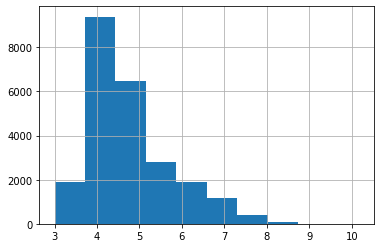

In [19]:
e_coli_pmic.pMIC.hist()

# And now same for S. aureus!

In 113k of s aureus datapoints there are 11k unique descriptors, that sometimes mention strain (there is no strain column that i can filter by easily), since i want to clear up my data of mutants and susceptible strains i need to get clever about this...


For every unique 'assay description' (for every compound), text search and discard descriptors containing the following keywords:
    1. sensitivity
    2. sensitive
    3. deficient
    4. susceptible
    5. mutated
    6. delta
    7. transformed
    8. plasmid
    9. substituted
    10. gene
    11. harboring
    12. lacking
    13. transconjugated 

I want compounds that are not susceptible or are mutants

In [20]:
### S. aureus

letgo_descriptors_s_aureus=[]

for descriptor in s_aureus_master['Assay Description'].unique():
    descriptor_lower = descriptor.lower()
    if re.search('(.*?)transconjugated(.*?)|(.*?)ampc(.*?)|(.*?)lacking(.*?)|(.*?)harboring(.*?)|(.*?)tol(.*?)|(.*?)ipx(.*?)|(.*?)substituted(.*?)|(.*?)gene(.*?)|(.*?)delta(.*?)|(.*?)transformed(.*?)|(.*?)plasmid(.*?)|(.*?)sensitivity(.*?)|(.*?)sensitive(.*?)|(.*?)deficient(.*?)|(.*?)susceptible(.*?)|(.*?)mutant(.*?)|(.*?)mutate(.*?)', descriptor_lower) is not None:
        letgo_descriptors_s_aureus.append(descriptor)
        
print('Descriptos found: ', len(letgo_descriptors_s_aureus))
print('They represent {} compounds to be avoided '.format(len(s_aureus_master[s_aureus_master['Assay Description'].isin(letgo_descriptors_s_aureus)])))


Descriptos found:  1893
They represent 15584 compounds to be avoided 


In [21]:
 # Drop molecule names!! (10k datapoints)

s_aureus_master_clean = s_aureus_master[s_aureus_master['Assay Description'].isin(letgo_descriptors) == False]

s_aureus_smiles = s_aureus_master_clean[s_aureus_master_clean['Molecule Name'].isna()][['Smiles', 'Standard Value', 'Standard Units', 'Molecular Weight']].dropna()
 

In [22]:
print('Final s. aureus count:', len(s_aureus_smiles))

Final s. aureus count: 89896


## Convert nM and ug.mL-1 ---> pMIC

In [23]:
s_aureus_smiles['Standard Units'].value_counts()

ug.mL-1             78922
nM                  10222
ug cm**-2             164
p.p.m.                129
10'-2 umol/ml         113
ug mg-1                80
ug                     57
U ml-1                 35
10'-2mmol/ml           30
10'-3micromol/ml       25
10'-2umol              20
10'-2micromol/ml       20
uL/ml                  15
microg                 14
ppm                    12
ug m1 l-1               9
10'-3uM/ml              9
microg/cm3              8
%                       5
ug/disk                 3
ug l-1                  1
ug cm**-3               1
ug disk-1               1
IU/ml                   1
Name: Standard Units, dtype: int64

In [24]:
df_ug_s_aureus = s_aureus_smiles[s_aureus_smiles['Standard Units'] =='ug.mL-1']
df_nm_s_aureus = s_aureus_smiles[s_aureus_smiles['Standard Units'] =='nM']

In [25]:
## Some calcualtions produce nans, that is due to mistypes from Chembl

df_ug_s_aureus['pMIC'] = [round((-1*np.log10(float(x) / 1000000)), 2) for x in df_ug_s_aureus.apply(lambda x :uM(x["Standard Value"], x["Molecular Weight"]), axis=1) ] 


df_nm_s_aureus['Standard Value'] = df_nm_s_aureus['Standard Value'].apply(np.float)

df_nm_s_aureus = df_nm_s_aureus[(df_nm_s_aureus['Standard Value'] > 0) & (df_nm_s_aureus['Standard Value'] < 1e6)]


df_nm_s_aureus['pMIC'] = [round((-1*np.log10(float(x) / 1000000000)), 2) for x in df_nm_s_aureus['Standard Value'].values] 

/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
s_aureus_pmic = df_ug_s_aureus.append(df_nm_s_aureus)

In [27]:
## Chembl errors!!??

s_aureus_pmic[s_aureus_pmic['pMIC'].isna()]

,Smiles,Standard Value,Standard Units,Molecular Weight,pMIC
2,FC(F)(F)Oc1ccc(-c2noc(-c3n[nH]cc3Cl)n2)cc1,128.0,ug.mL-1,330.65,NaN
22,O=C1CS/C(=N\N=C2CCCCCC2)N1Cc1ccc([N+](=O)[O-])cc1,256.0,ug.mL-1,360.44,NaN
39,N#Cc1ccc(-c2nc3ccccc3c(=O)[nH]2)cc1,128.0,ug.mL-1,247.26,NaN
40,CC(C)(C)OC(=O)CCCCNC(=O)[C@H](CCCCN1C(=O)c2ccc...,500.0,ug.mL-1,617.48,NaN
41,C[C@@H](NC(=O)[C@H](CCCCNC(=O)CI)NC(=O)OC(C)(C...,125.0,ug.mL-1,612.51,NaN
...,...,...,...,...,...
113498,Clc1cc(Cl)cc(N2N=C(c3ccc(Br)cc3)CC2c2cccc(Nc3c...,1000.0,ug.mL-1,622.78,NaN
113499,CC(=O)N1N=C(c2ccc(C)cc2)CC1c1cccc(Nc2ccnc3cc(C...,1000.0,ug.mL-1,454.96,NaN
113524,O=C(/C=C/c1cccc(Nc2ccnc3cc(Cl)ccc23)c1)c1ccc(B...,1000.0,ug.mL-1,463.76,NaN
113525,O=CN1N=C(c2ccccc2)CC1c1cccc(Nc2ccnc3cc(Cl)ccc2...,1000.0,ug.mL-1,426.91,NaN


In [28]:
# dropna
s_aureus_pmic = s_aureus_pmic.dropna()
print('after unit conversion: ', len(s_aureus_pmic) )

s_aureus_pmic =  pd.DataFrame(s_aureus_pmic.groupby(s_aureus_pmic.Smiles).mean()).reset_index()

after unit conversion:  75124


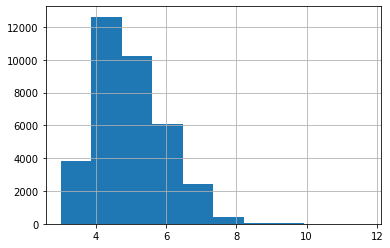

In [29]:
s_aureus_pmic.pMIC.hist()

### Let's examine duplicates before checking for overlap (permeation- proxy)

There are many duplicated values for same compounds(e.coli - 10k, s.aureus - 6k), i will average over them to lower probability of error

In [30]:
#e_coli_pmic =  pd.DataFrame(e_coli_pmic.groupby(e_coli_pmic.Smiles).mean()).reset_index()


In [31]:
print('Before combination, final curated numbers: E. coli: {}, S. aureus: {}'.format(len(e_coli_pmic), len(s_aureus_pmic)))

Before combination, final curated numbers: E. coli: 24102, S. aureus: 35802


## Combination

In [32]:
# e_coli_pmic = e_coli_pmic.drop_duplicates(subset=['Smiles'], keep = 'first')
# s_aureus_pmic = s_aureus_pmic.drop_duplicates(subset=['Smiles'], keep = 'first')

In [33]:
merge = e_coli_pmic[['Smiles', 'pMIC']].merge(s_aureus_pmic[['Smiles', 'pMIC']], how='inner', on = 'Smiles', suffixes=['_e_coli','_s_aureus'])

In [34]:
merge= merge[merge['pMIC_s_aureus']>=5].dropna()

In [35]:
merge

,Smiles,pMIC_e_coli,pMIC_s_aureus
0,Br.Br.CCCCC(CC)CN=c1ccn(CCCCCCCCCCCCn2ccc(=NCC...,5.870000,6.170
1,Br.Br.CCCCC(CC)CN=c1ccn(CCCCCCCCCCn2ccc(=NCC(C...,5.960000,6.550
2,Br.Br.CCCCC(CC)CN=c1ccn(CCCCCCCCCn2ccc(=NCC(CC...,5.840000,6.370
3,Br.Br.CCCCC(CC)CN=c1ccn(CCCCCCCCn2ccc(=NCC(CC)...,5.536667,6.360
4,Br.Br.CCCCC(CC)CN=c1ccn(CCCCCCCn2ccc(=NCC(CC)C...,5.240000,6.130
...,...,...,...
18469,c1ccc2c(c1)cc1c3ccccc3nc(-c3c[nH]c4ccccc34)n21,5.130000,5.130
18471,c1ccc2c(c1)cc1c3ccccc3nc(-c3csc4ccccc34)n21,5.195000,5.195
18472,c1ccc2c(c1)nc(-c1ccc(-c3nc4ccccc4c4nc5ccccc5n3...,5.320000,5.320
18475,c1ccc2cc(-c3nc4ccccc4c4cc5ccccc5n34)c(-c3nc4cc...,4.200000,5.050


In [36]:
print('permeating compounds:', len(merge[(merge['pMIC_s_aureus']>=5) & (merge['pMIC_e_coli']>=5)]))

print('non-permeating compounds:', len(merge[(merge['pMIC_s_aureus']>=5) & (merge['pMIC_e_coli']<5)]))

permeating compounds: 5009
non-permeating compounds: 2955


### Write compounds

In [46]:
active = merge[(merge['pMIC_s_aureus']>=5) & (merge['pMIC_e_coli']>=5)].reset_index(drop=True)

inactive = merge[(merge['pMIC_s_aureus']>=5) & (merge['pMIC_e_coli']<5)].reset_index(drop=True)

In [47]:
active['Class']=[1 for x in active.Smiles]

In [48]:
active = active.drop(columns=['pMIC_s_aureus'])

In [49]:
inactive['Class']=[0 for x in inactive.Smiles]
inactive = inactive.drop(columns=['pMIC_s_aureus'])

In [50]:
chembl_complete = active.append(inactive)

In [51]:
chembl_complete.to_csv('../all_data/chembl_curated/chembl_e_coli_saureus.csv')

In [52]:
chembl_complete.drop(columns=['Class']).to_csv('chembl_permeation_all.csv', index=False)

## END

## Comapre compounds from this to the ones you're using now!

In [ ]:
coadd_spark = pd.read_csv('../all_data/coadd_spark/co_add_spark_class_all.csv')

In [ ]:
coadd_spark['mols'] = [Chem.MolFromSmiles(x) for x in coadd_spark.SMILES]

In [ ]:
coadd_spark['fps'] = [Chem.AllChem.GetMorganFingerprintAsBitVect(x,3,2048) for x in coadd_spark.mols.values]

In [ ]:
e_coli_master_mols = [Chem.MolFromSmiles(x) for x in e_coli_master.Smiles.dropna()]
e_coli_master_fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(x,3,2048) for x in e_coli_master_mols]

In [ ]:
s_master_mols = [Chem.MolFromSmiles(x) for x in s_aureus_master.Smiles.dropna()]
s_master_fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(x,3,2048) for x in s_master_mols]

In [ ]:
# fps similarity

from rdkit import DataStructs

def similarity_index(a, b, cutoff): # takes fingerprints and compares them returning list of indexes
    index_similar_comps=[]
    for num in range(0,len(a)):
        for num2 in range(0,len(b)):
            if DataStructs.FingerprintSimilarity(a[num], b[num2]) >= cutoff :
                index_similar_comps.append(num2)
                break
    return index_similar_comps

In [ ]:
sim_2 = similarity_index(coadd_spark.fps.values, s_master_fps, 0.95 )

In [ ]:
sim_2

In [ ]:
e_coli_fps = pd.DataFrame(e_coli_master_fps)

In [ ]:
sim = similarity_index(coadd_spark.fps.values, e_coli_fps[0].values, 0.95 )

In [ ]:
sim

In [ ]:
list(set(sim) & set(sim_2))

In [ ]:
same_smiles=[]
for smile in e_coli_master['Smiles']:
    if len(coadd_spark[coadd_spark['SMILES']==smile]) != 0 :
        same_smiles.append(smile)

In [ ]:
len(same_smiles)

In [ ]:
merge['mols'] = [Chem.MolFromSmiles(x) for x in merge.Smiles]

In [ ]:
merge[['mols']].merge(coadd_spark['mols'])

## Word Frequency

In [ ]:
# sort values

e_coli_valid_assay=[]
e_coli_invalid_assay=[]
count=0


for descriptor in without_NCTC_12241['Assay Description'].unique()[:100]:
    print('Counting down: ', len(without_NCTC_12241['Assay Description'].unique()) - count)
    print('Descriptor:', descriptor)
    print('len: ', len(without_NCTC_12241[without_NCTC_12241['Assay Description']==descriptor]))
    join = input('yea or nea\n')
    if join  in ['yes', 'Yes', 'y', 'Y', 'yea']:
        e_coli_valid_assay.append(descriptor)
    elif join  in ['no', 'No', 'n', 'N', 'nea', '']:
        e_coli_invalid_assay.append(descriptor)
    count+=1

In [ ]:
# e_coli_master.drop(e_coli_master[e_coli_master['Assay Description'].isin(susceptible)].index)
# e_coli_master[e_coli_master['Assay Description'].isin(susceptible) == False]

In [ ]:
def freq(string):
    string = string.lower()
    # break the string into list of words
    str_list = string.split()
  
    # gives set of unique words
    unique_words = set(str_list)
      
    for words in unique_words :
        print('Frequency of ', words , 'is :', str_list.count(words))

In [ ]:
descriptors = e_coli_master['Assay Description'].unique()

In [ ]:
descriptors_list = list(descriptors)

In [ ]:
one_big_descriptor = " ".join(descriptors_list)

In [ ]:
l=[]
for word in set(one_big_descriptor.lower().split()):
    l.append((word, one_big_descriptor.lower().split().count(word)))
l.sort(key=lambda x:x[1],reverse=True )
l

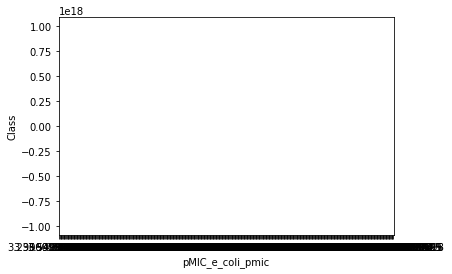

In [23]:
import seaborn as sns

sns.stripplot(y = master[master['Class']==1]['Class'], x = master[master['Class']==0]['pMIC_e_coli_pmic'])

In [21]:
master = pd.read_csv('../all_data/chembl_curated/chembl_e_coli_saureus.csv')